In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'/home/x64741ms/Downloads/_PathFinder/for_GitHub_09.11.2024'

In [3]:
# Sample data loadinghttp://localhost:8983/notebooks/Working_Capacity__Heating_8NOV_2024.ipynb#
df = pd.read_csv('Heating_calc1.csv')

In [4]:
df.head()

,name,Adsorption,Desorption,deltaW,enthalpy_298K,enthalpy_363K,medium_enthalpy_of_ads,Qcon+Qads,Qregen,COPh
0,NU-1000,0.90,0.61,0.29,-30.80,-19.49361,-25.146925,52.687646,130.204648,1.404653
1,T,0.73,0.58,0.15,-33.43,-26.12000,-29.775000,27.252230,97.182326,1.280424
2,2T,1.29,0.82,0.47,-29.62,-18.66000,-24.140000,85.390322,177.560925,1.480907
3,3T,2.00,0.97,1.03,-27.53,-17.35000,-22.440000,187.131983,315.047697,1.593980
4,TBT,2.23,1.06,1.17,-25.97,-17.45000,-21.710000,212.567398,341.774161,1.621953


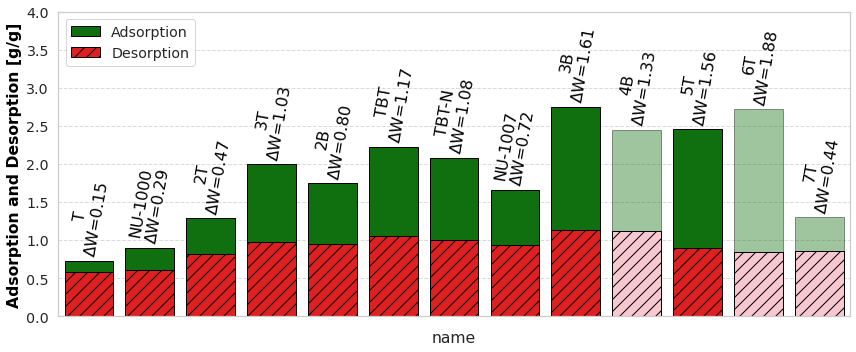

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df contains 'name', 'Adsorption', 'Desorption', and 'deltaW' columns
# Replace 'deltaW_column_name' with the actual name of the column in your DataFrame
deltaW_column_name = 'deltaW'

# Define the desired order of names
desired_order = ['T', 'NU-1000', '2T', '3T', '2B', 'TBT', 'TBT-N', 'NU-1007', '3B', '4B', '5T', '6T', '7T']

# Remove rows with 'nan' values in 'Adsorption' and 'Desorption' columns
df = df.dropna(subset=['Adsorption', 'Desorption'])

# Set the style for the plot (optional, for a scientific publication look)
sns.set(style="whitegrid", font_scale=1.3)

# Create a new figure with a dark background
plt.figure(figsize=(12, 5))
sns.set_palette("pastel")

# Sort the DataFrame based on the desired order
df['name'] = pd.Categorical(df['name'], categories=desired_order, ordered=True)
df = df.sort_values('name')

# Create barplots using Seaborn for Adsorption and Desorption with equal width
ax = sns.barplot(x=df['name'], y=df['Adsorption'], color='green', edgecolor='black', label='Adsorption', alpha=1.0, capsize=0.05)

# Manually adjust the position of Desorption bars to overlap Adsorption bars
# Set the color of specified names to pinkish for Desorption bars
colors_desorption = ['pink' if name in ['4B', '6T', '7T'] else 'red' for name in df['name']]
ax = sns.barplot(x=df['name'], y=df['Desorption'], palette=colors_desorption, hatch='//', edgecolor='black', label='Desorption', alpha=1.0, capsize=0.05, ax=ax)

# Make 'Adsorption' bars of specific names transparent
transparent_names = ['4B', '6T', '7T']
for i, name in enumerate(df['name']):
    if name in transparent_names:
        ax.patches[i].set_alpha(0.4)  # Set transparency for specific bars

# Add 'name', delta symbol, 'W =' and 'deltaW' on top of Adsorption bars, excluding the last two bars
for i, (name, deltaW) in enumerate(zip(df['name'][:], df[deltaW_column_name][:])):
    ax.text(i, df['Adsorption'].iloc[i] + 0.05, f"{name}\nΔW={deltaW:.2f}", color='black', ha='center', va='bottom', rotation=80, fontsize='16')

# Remove x-axis labels
ax.set_xticklabels([])

# Set plot labels and title
plt.ylabel('Adsorption and Desorption [g/g]', fontweight='bold', color='black')

# Set Y-axis limit to 2.2
plt.ylim(0.0, 4.0)

# Add legends
plt.legend(title='', title_fontsize='14', loc='upper left')

# Beautify the plot with a title and grid
plt.title('', fontsize='16', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot with DPI=600
plt.tight_layout()
plt.savefig('HEATING_Adsorption_Desorption_HEAT_PUMP_Plot_not_tall_filtered.png', dpi=600)
plt.show()
